In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced

In [2]:
df_white_wine = pd.read_csv("white_wine.csv")
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
df_white_wine['quality'] = np.where(df_white_wine['quality'] > 6.0, 1, 0)
df_white_wine.dropna(inplace=True)
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [4]:
data_classification = df_white_wine[['density', 'alcohol', 'quality']].copy()
data_classification

,density,alcohol,quality
0,1.0010,8.8,0
1,0.9940,9.5,0
2,0.9951,10.1,0
3,0.9956,9.9,0
4,0.9956,9.9,0
...,...,...,...
514,1.0002,10.3,1
515,0.9926,10.4,0
516,0.9934,9.1,0
517,0.9920,10.4,0


In [29]:
# Melihat Summary Numericalnya
jumlah_label_0 = data_classification[data_classification['quality'] == 0]['quality'].count()
jumlah_label_1 = data_classification[data_classification['quality'] == 1]['quality'].count()
jumlah_total_data = data_classification['quality'].count()
print(jumlah_label_0, jumlah_label_1, jumlah_total_data)

print(f"Jumlah persentase data per-kelas, adalah: {jumlah_label_0/jumlah_total_data} untuk kelas 0, dan {jumlah_label_1/jumlah_total_data} untuk kelas 1")

421 98 519
Jumlah persentase data per-kelas, adalah: 0.8111753371868978 untuk kelas 0, dan 0.18882466281310212 untuk kelas 1


In [6]:
X = data_classification[['density', 'alcohol']].copy()
y = data_classification['quality'].copy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020, test_size=0.2)

In [8]:
logistic_regression_model = LogisticRegression().fit(X=X_train, y=y_train)

In [9]:
y_pred = logistic_regression_model.predict(X_test)

In [30]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92        84
           1       0.73      0.40      0.52        20

    accuracy                           0.86       104
   macro avg       0.80      0.68      0.72       104
weighted avg       0.84      0.86      0.84       104



In [11]:
polynomial_transform = PolynomialFeatures(
    degree = 3,
    interaction_only = False,
)

In [12]:
polynomial_transform.fit(X_train)

PolynomialFeatures(degree=3)

In [31]:
X_train_poly = polynomial_transform.transform(X_train)
X_test_poly = polynomial_transform.transform(X_test)

In [32]:
logistic_regression_model_polynomial = LogisticRegression().fit(X=X_train_poly, y=y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
y_pred_polynomial = logistic_regression_model_polynomial.predict(X_test_poly)

In [34]:
print("Logistic Regression Classification Report with Polynomial:\n", classification_report(y_test, y_pred_polynomial))

Logistic Regression Classification Report with Polynomial:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        84
           1       1.00      0.75      0.86        20

    accuracy                           0.95       104
   macro avg       0.97      0.88      0.91       104
weighted avg       0.95      0.95      0.95       104



Imbalanced Classification: Undersampling

In [35]:
rus = RandomUnderSampler(random_state=2020)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

In [36]:
print(X_undersampled.count(), y_undersampled.count())

density    196
alcohol    196
dtype: int64 196


In [19]:
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=2020)

In [20]:
logistic_regression_undersampled_model = LogisticRegression().fit(X=X_train_undersampled, y=y_train_undersampled)

In [21]:
y_pred_logistic_regression_undersampled = logistic_regression_undersampled_model.predict(X=X_test_undersampled)

In [22]:
print("Logistic Regression Classification Report with undersampled:\n", classification_report(y_true=y_test_undersampled, y_pred=y_pred_logistic_regression_undersampled))

Logistic Regression Classification Report with undersampled:
               precision    recall  f1-score   support

           0       0.62      0.89      0.73        18
           1       0.86      0.55      0.67        22

    accuracy                           0.70        40
   macro avg       0.74      0.72      0.70        40
weighted avg       0.75      0.70      0.69        40



Imbalanced Classification: Oversampling

In [23]:
ros = RandomOverSampler(random_state=2020)
X_oversampled, y_oversampled = ros.fit_resample(X,y)

In [24]:
print(X_oversampled.count(), y_oversampled.count())

density    842
alcohol    842
dtype: int64 842


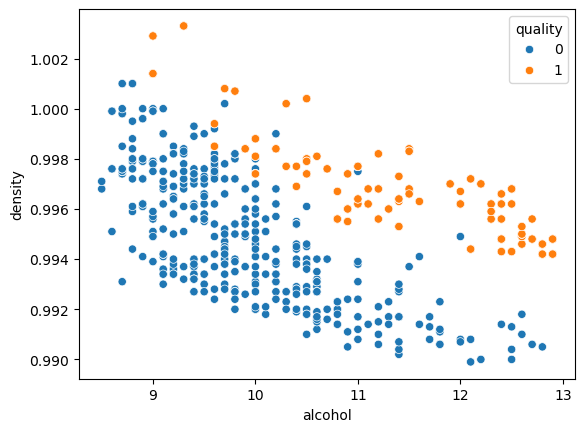

In [37]:
sns.scatterplot(
    data = X_oversampled,
    x = 'alcohol',
    y = 'density',
    hue = y_oversampled
)
plt.show()

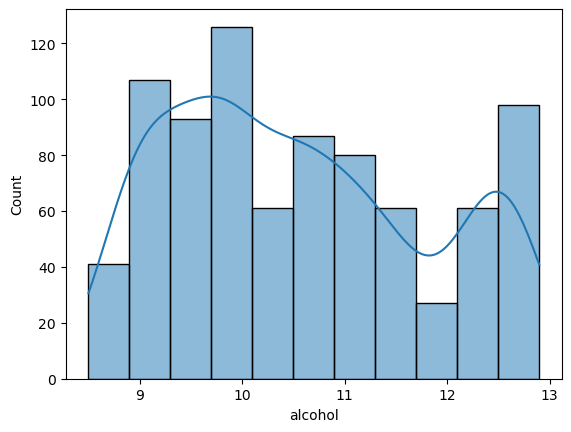

In [38]:
sns.histplot(
    data = X_oversampled,
    x = "alcohol",
    kde = True
)
plt.show()

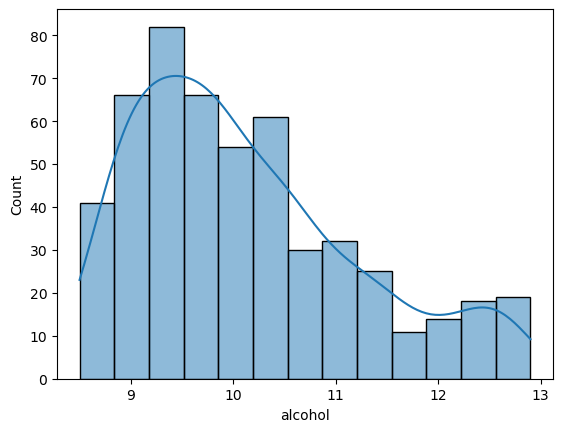

In [39]:
sns.histplot(
    data = X,
    x = "alcohol",
    kde = True
)
plt.show()

In [25]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=2020)

In [26]:
logistic_regression_oversampled_model = LogisticRegression().fit(X=X_train_oversampled, y=y_train_oversampled)

In [27]:
y_pred_logistic_regression_oversampled = logistic_regression_oversampled_model.predict(X=X_test_oversampled)

In [28]:
print("Logistic Regression Classification Report with undersampled:\n", classification_report(y_true=y_test_oversampled, y_pred=y_pred_logistic_regression_oversampled))

Logistic Regression Classification Report with undersampled:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74        82
           1       0.78      0.64      0.70        87

    accuracy                           0.72       169
   macro avg       0.73      0.72      0.72       169
weighted avg       0.73      0.72      0.72       169



In [40]:
data_classification[data_classification['quality']==1].describe()

,density,alcohol,quality
count,98.000000,98.000000,98.0
mean,0.997068,11.250000,1.0
std,0.002247,1.128383,0.0
min,0.994200,9.000000,1.0
25%,0.995525,10.425000,1.0
50%,0.996700,11.250000,1.0
75%,0.997975,12.400000,1.0
max,1.003300,12.900000,1.0


Assessment of multiple undersampling methods

In [45]:
undersamplers = [
    CondensedNearestNeighbour(random_state=2020), 
    NeighbourhoodCleaningRule(), 
    NearMiss()
]

for sampler in undersamplers:
    #fit terhadap data awal
    print(vars(sampler))
    
    X_undersampled, y_undersampled = sampler.fit_resample(X, y)
    X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=2020)

    logreg_model_undersampled = LogisticRegression().fit(X = X_train_undersampled, y = y_train_undersampled)

    y_pred_undersampled = logreg_model_undersampled.predict(X = X_test_undersampled)

    logreg_model_undersampled_report = classification_report(
        y_true = y_test_undersampled,
        y_pred = y_pred_undersampled
    )
    print(classification_report(y_true=y_test_oversampled, y_pred=y_pred_logistic_regression_oversampled))

{'sampling_strategy': 'auto', 'random_state': 2020, 'n_neighbors': None, 'n_seeds_S': 1, 'n_jobs': None}
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        82
           1       0.78      0.64      0.70        87

    accuracy                           0.72       169
   macro avg       0.73      0.72      0.72       169
weighted avg       0.73      0.72      0.72       169

{'sampling_strategy': 'auto', 'edited_nearest_neighbours': None, 'n_neighbors': 3, 'kind_sel': 'deprecated', 'threshold_cleaning': 0.5, 'n_jobs': None}
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        82
           1       0.78      0.64      0.70        87

    accuracy                           0.72       169
   macro avg       0.73      0.72      0.72       169
weighted avg       0.73      0.72      0.72       169

{'sampling_strategy': 'auto', 'version': 1, 'n_neighbors': 3, 'n_neighbors_ver3': 3, 'n_j

Asssesment of SMOTE oversampling

In [47]:
X_oversampled, y_oversampled = SMOTE().fit_resample(X,y)
print(len(X_oversampled), len(y_oversampled))

X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=2020)

logreg_model_oversampled = LogisticRegression().fit(X = X_train_oversampled, y = y_train_oversampled)

y_pred_oversampled = logreg_model_oversampled.predict(X = X_test_oversampled)

logreg_model_oversampled_report = classification_report(
    y_true = y_test_oversampled,
    y_pred = y_pred_oversampled
)
print(logreg_model_oversampled_report)

842 842
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        82
           1       0.78      0.71      0.74        87

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169



SMOTE + Class Weight Parameter

In [48]:
logreg_model_oversampled_classweighted = LogisticRegression(
    class_weight = {
        0 : 0.3,
        1 : 0.7
    }
    ).fit(X = X_train_oversampled, y = y_train_oversampled)

y_pred_oversampled = logreg_model_oversampled_classweighted.predict(X = X_test_oversampled)

logreg_model_oversampled_report = classification_report(
    y_true = y_test_oversampled,
    y_pred = y_pred_oversampled
)
print(logreg_model_oversampled_report)

              precision    recall  f1-score   support

           0       0.79      0.51      0.62        82
           1       0.66      0.87      0.75        87

    accuracy                           0.70       169
   macro avg       0.72      0.69      0.69       169
weighted avg       0.72      0.70      0.69       169



In [49]:
#class weight parameter on raw data

logreg_model_classweighted = LogisticRegression(
    class_weight = {
        0 : 0.25,
        1 : 0.75
    }
    ).fit(X = X_train, y = y_train)

y_pred = logreg_model_classweighted.predict(X = X_test)

logreg_model_report = classification_report(
    y_true = y_test,
    y_pred = y_pred
)
print(logreg_model_report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        84
           1       0.48      0.60      0.53        20

    accuracy                           0.80       104
   macro avg       0.69      0.72      0.70       104
weighted avg       0.82      0.80      0.81       104



In [51]:
y_pred = logistic_regression_model.predict(X = X_test)
logreg_model_report = classification_report(
    y_true = y_test,
    y_pred = y_pred
)
print(logreg_model_report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        84
           1       0.73      0.40      0.52        20

    accuracy                           0.86       104
   macro avg       0.80      0.68      0.72       104
weighted avg       0.84      0.86      0.84       104



Imbalanced metrics

In [53]:
logreg_model_oversampled_report_imbalanced = classification_report_imbalanced(
    y_true = y_test_oversampled,
    y_pred = y_pred_oversampled
)
print(logreg_model_oversampled_report_imbalanced)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.51      0.87      0.62      0.67      0.43        82
          1       0.66      0.87      0.51      0.75      0.67      0.46        87

avg / total       0.72      0.70      0.69      0.69      0.67      0.45       169

